В этом задании предлагается провести небольшой анализ данных датасета [studens](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов. Берем датасет `student-mat.csv`, который про математиков.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

In [1317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Задание 1 ★☆☆
Считайте файл в переменную `data` определите размер таблицы.

In [1318]:
data = pd.read_csv('student-mat.csv', sep=';')

In [1319]:
# размер это tuple (количество строк, количество столбцов)
shape = data.shape

Значение для формы

In [1320]:
print(' '.join(map(str, shape)))

395 33


Посмотрите первые пять строк

In [1321]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Выведите список названий столбцов

In [1322]:
print(data.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


### Задание 2 ★☆☆
Определите количество студентов, у которых оценка G1 выше среднего.

In [1323]:
mean_g1 = data['G1'].mean()
more_than_mean = len(data[data['G1'] > mean_g1])

Ответ:

In [1324]:
print(more_than_mean)

202


### Задание 3 ★☆☆
Определите значение для поля `absences` после сортировки по убыванию по полю `G3`, которое находится на 100 позиции после сортировки (отсчет с 0).

In [1325]:
sorted_data = data.sort_values('G3', ascending=False)
absences_at_100 = sorted_data.iloc[99]['absences']

Ответ:

In [1326]:
print(absences_at_100)

6


### Задание 4 ★☆☆
Определите долю студентов женского и мужского пола.

In [1327]:
# получите объект pandas series, индексы которого: F и M
serires_object = data['sex'].value_counts(normalize=True)

Ответ:

In [1328]:
print("{:.3f} {:.3f}".format(serires_object['M'], serires_object['F']))

0.473 0.527


### Задание 5 ★★☆
Определите общее количество пропущенных значений в таблице.

In [1329]:
null_count = data.isnull().sum().sum()

Ответ:

In [1330]:
print(null_count)

0


### Задание 6 ★★☆
Определите уникальные значения 'Mjob', отсортируйте их по алфавиту, сопоставьте каждому значению его позицию в отсорированном списке и замените значения в таблице на его позицию. Например, если вы получили список уникальных значений ['a', 'c', 'f'], то вместо 'a' везде нужно поставить 0, вместо 'c' везде нужно поставить 1, а вместо 'f' -
2.

In [1331]:
unique_mjobs = sorted(data['Mjob'].unique())
mjob_to_index = {job: idx for idx, job in enumerate(unique_mjobs)}
data['Mjob'] = data['Mjob'].map(mjob_to_index)


Ответ:

In [1332]:
print(data['Mjob'].value_counts().idxmax())

2


## Задание 7 ★★☆
Сгруппируйте данные по полю 'sex' и определите среднее значение, медиану и максимальное значение оценок 'G3'.
Подсказка: agg

In [1333]:
# получите data frame с соответсвующими стрками (по полю sex) и столбцами (среднее, медиана и максимум)
df_grouped = data.groupby('sex')['G3'].agg(['mean', 'median', 'max'])

Ответ:

In [1334]:
print("{:.3f}".format(df_grouped.sum().sum()))

80.881


## Задание 8 ★★☆
Определите среднее количество пропусков занятий ('absences') среди студентов, каждая оценка которых ('G1', 'G2', 'G3') выше медианы.

In [1335]:
median_g1 = data['G1'].median()
median_g2 = data['G2'].median()
median_g3 = data['G3'].median()

high_level = data[
    (data['G1'] > median_g1) &
    (data['G2'] > median_g2) &
    (data['G3'] > median_g3)]

mean_score_high_level = high_level['absences'].mean()

Ответ:

In [1336]:
print("{:.4f}".format(mean_score_high_level))

4.4926


## Задание 9 ★★☆ Визуализация в pandas

Постройти распределение оценок 'G1'(гистограмму). Используйте методы для data frame и series.

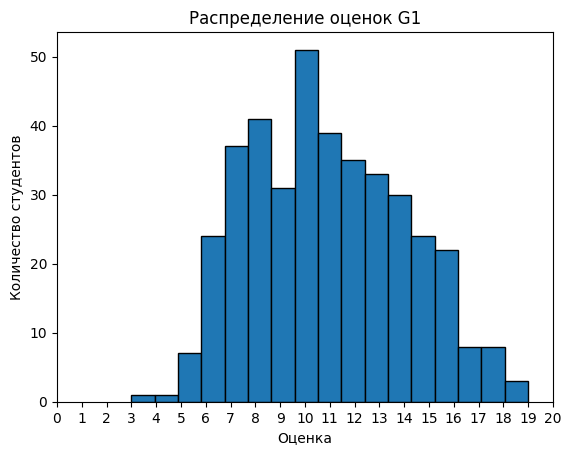

In [1337]:
data['G1'].plot(title ='Распределение оценок G1',
                kind ='hist',
                bins = 17,
                edgecolor = 'black',
                xlabel ='Оценка',
                ylabel ='Количество студентов')
plt.xticks(np.arange(0, 21, 1))
plt.show()

Постройте scatter plot по признакам 'G3'и 'absences'

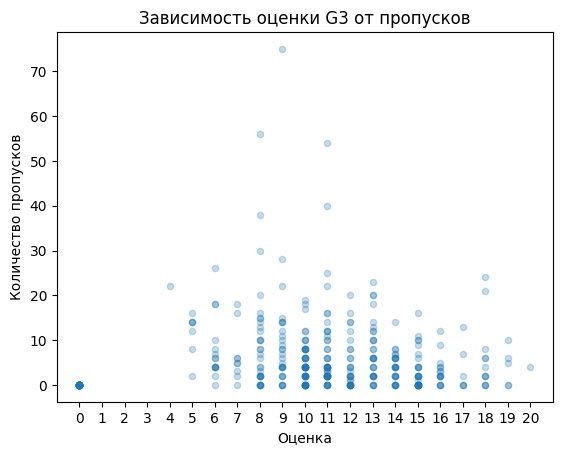

In [1338]:
data.plot(title ='Зависимость оценки G3 от пропусков',
          kind ='scatter',
          x ='G3',
          y ='absences',
          xlabel ='Оценка',
          ylabel ='Количество пропусков',
          alpha = 0.25)
plt.xticks(np.arange(0, 21, 1))
plt.show()